In [1]:
import pandas as pd
import os
import statistics 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


dirname = os.getcwd()
folder_path = os.path.join(dirname, '')

train_data_path = os.path.join(folder_path, '../data/train_data_FD001.txt')
train_data = pd.read_csv(train_data_path)
train_data.set_index('time_in_cycles')

test_data_path = os.path.join(folder_path, '../data/test_data_FD001.txt')
test_data = pd.read_csv(test_data_path)
test_data.set_index('time_in_cycles')

# retrieve the max cycles per engine: RUL
train_rul = pd.DataFrame(train_data.groupby('engine_no')['time_in_cycles'].max()).reset_index()

# merge the RULs into the training data
train_rul.columns = ['engine_no', 'max']
train_data = train_data.merge(train_rul, on=['engine_no'], how='left')
# add the current RUL for every cycle
train_data['RUL'] = train_data['max'] - train_data['time_in_cycles']
train_data.drop('max', axis=1, inplace=True)

# drop the columns not needed
cols_nan = train_data.columns[train_data.isna().any()].tolist()
cols_const = [ col for col in train_data.columns if len(train_data[col].unique()) <= 2 ]

cols_irrelevant = ['operational_setting_1', 'operational_setting_2', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13']

# Drop the columns without or with constant data
train_data = train_data.drop(columns=cols_const + cols_nan + cols_irrelevant)
test_data = test_data.drop(columns=cols_const + cols_nan + cols_irrelevant)



# define the columns for training
train_data_inputs = train_data.copy()
train_data_inputs.drop(columns=['RUL', 'engine_no', 'time_in_cycles'], inplace=True)
training_columns = train_data_inputs.columns


In [2]:
train_data.shape

(20631, 14)

In [3]:
test_data.shape

(13096, 14)

Standard Deviation of the sample is 68.8809901772182 
Mean of the sample is 107.80786195530997 
90 percentile 195.97552938214926
10 percentile 18.262574724926324
train_data['RUL'] (20631,)
< 10 percentile (1900, 14)
> 10 percentile (18731, 14)


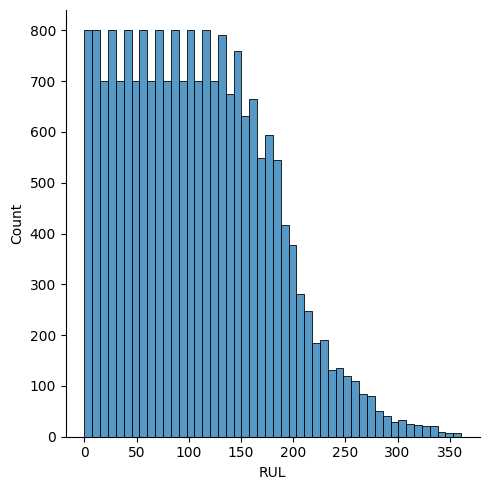

In [4]:
sns.displot(train_data['RUL'])
 
print("Standard Deviation of the sample is % s "% (statistics.stdev(train_data['RUL'])))
print("Mean of the sample is % s " % (statistics.mean(train_data['RUL']))) 
_90_perc = 1.28 * statistics.stdev(train_data['RUL']) + statistics.mean(train_data['RUL'])
_10_perc = -1.3 * statistics.stdev(train_data['RUL']) + statistics.mean(train_data['RUL'])

print("90 percentile", _90_perc)
print("10 percentile", _10_perc)

print("train_data['RUL']", train_data['RUL'].shape)
print("< 10 percentile", train_data[train_data['RUL'] < _10_perc].shape)
print("> 10 percentile", train_data[train_data['RUL'] > _10_perc].shape)

/tmp/ipykernel_1247211/1030310103.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_data['RUL'], hist=True)


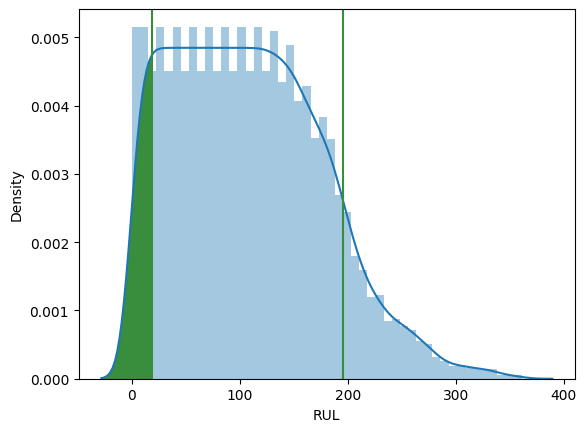

In [13]:
x0 = 18.262574724926324
x1 = 195.97552938214926

#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(train_data['RUL'], hist=True)
kde_x, kde_y = ax.lines[0].get_data()

#plotting the two lines
p1 = plt.axvline(x=x0,color='#388E3C')
p2 = plt.axvline(x=x1,color='#388E3C')


# ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1), interpolate=True, color='#388E3C')
ax.fill_between(kde_x, kde_y, where=(kde_x<x0), interpolate=True, color='#388E3C')

plt.show()

fig = ax.get_figure()
fig.savefig("../results/RUL_distribution_train_1q.png")

Standard Deviation of the sample is 58.98011408191748 
Mean of the sample is 141.23846976175932 
90 percentile 216.7330157866137
10 percentile 64.5643214552666
train_data['RUL'] (13096,)
< 10 percentile (1398, 14)
> 10 percentile (11698, 14)


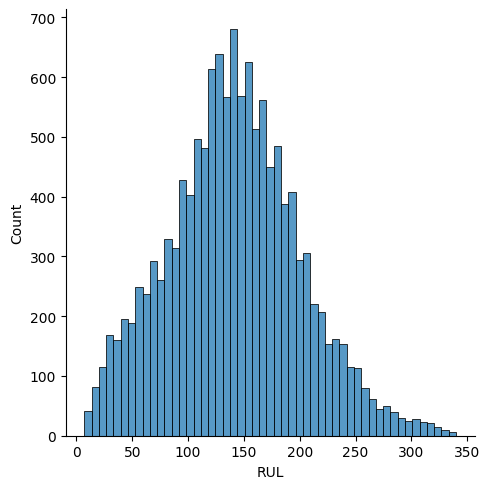

In [14]:
sns.displot(test_data['RUL'])
 
print("Standard Deviation of the sample is % s "% (statistics.stdev(test_data['RUL'])))
print("Mean of the sample is % s " % (statistics.mean(test_data['RUL']))) 

_90_perc = 1.28 * statistics.stdev(test_data['RUL']) + statistics.mean(test_data['RUL'])
_10_perc = -1.3 * statistics.stdev(test_data['RUL']) + statistics.mean(test_data['RUL'])

print("90 percentile", _90_perc)
print("10 percentile", _10_perc)

print("train_data['RUL']", test_data['RUL'].shape)
print("< 10 percentile", test_data[test_data['RUL'] < _10_perc].shape)
print("> 10 percentile", test_data[test_data['RUL'] > _10_perc].shape)

/tmp/ipykernel_1247211/3432960961.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(test_data['RUL'], hist=True)


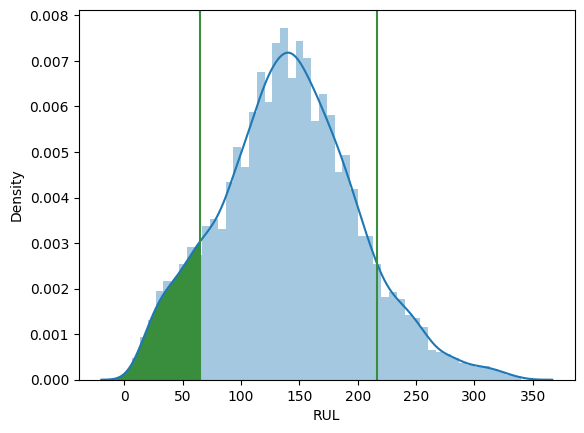

In [15]:
x0 = 64.5643214552666
x1 = 216.7330157866137

#plotting the PDF (do this before plotting anything else)
ax = sns.distplot(test_data['RUL'], hist=True)
kde_x, kde_y = ax.lines[0].get_data()

#plotting the two lines
p1 = plt.axvline(x=x0,color='#388E3C')
p2 = plt.axvline(x=x1,color='#388E3C')


# ax.fill_between(kde_x, kde_y, where=(kde_x<x0) | (kde_x>x1), interpolate=True, color='#388E3C')
ax.fill_between(kde_x, kde_y, where=(kde_x<x0), interpolate=True, color='#388E3C')

plt.show()

fig = ax.get_figure()
fig.savefig("../results/RUL_distribution_test_1q.png")

In [8]:
train_data['RUL'][train_data['RUL'] > 18.262574724926324].shape

(18731,)

In [9]:
train_data['RUL'][train_data['RUL'] < 18.262574724926324].shape

(1900,)